In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/D/Downloads/dataset_banco.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [13]:
#Rename 
data.columns =[
    'Edad',
    'Trabajo',
    'Estado_civil',
    'Educacion',
    'Mora',
    'Saldo',
    'Vivienda',
    'Prestamo',
    'Contacto',
    'Dia',
    'Mes',
    'Duracion',
    'Campana',
    'Dias_previos',
    'Anterior',
    'Resultado',
    'Respuesta']

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
# Supongamos que ya tienes tu DataFrame llamado 'data' con una columna de 'Edad'
print(data['Edad'].unique())  # Verifica los valores únicos de la columna 'Edad'

# Definir los límites de los grupos etarios (por ejemplo, 0-17, 18-35, 36-60, 61+)
bins = [0, 17, 35, 60, 100]

# Definir las etiquetas para cada grupo etario
labels = ['0-17', '18-35', '36-60', '61+']

# Crear una nueva columna 'Grupo_Etario' con los grupos de edad
data['Grupo_Etario'] = pd.cut(data['Edad'], bins=bins, labels=labels, right=False)

# Mostrar los primeros registros para verificar
print(data[['Edad', 'Grupo_Etario']].head())

[ 58  44  33  47  35  28  42  43  41  29  53  57  51  45  60  56  32  25
  40  39  52  46  36  49  59  37  50  54  55  48  24  38  31  30  27  34
  23  26  61 530  22 490  21 123  20 332 311 399 466  66  62  83  75  67
  70  65  68  64  69  72  71  19  76  85  63  90  82  73  74  78  80  94
  79  77  86  95  81  18  89  84  87  92 776  93  88]
   Edad Grupo_Etario
0    58        36-60
1    44        36-60
2    33        18-35
3    47        36-60
4    33        18-35


In [7]:
# data.info

In [9]:
# data.dtypes

In [11]:
data.shape

(45215, 17)

In [17]:
#Columnas por categorias 
categoricas= data.select_dtypes(include=['object']).columns.tolist()
numericas= data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numericas

['Edad', 'Saldo', 'Dia', 'Duracion', 'Campana', 'Dias_previos', 'Anterior']

In [19]:
from IPython.display import display, Markdown
Job= pd.value_counts(data['Trabajo'])
Education= pd.value_counts(data['Educacion'])
# Mora= pd.value_counts(data['Morosidad'])
# Vivienda= pd.value_counts(data['Vivienda'])
# Prestamo= pd.value_counts(data['Prestamo'])
# Contact= pd.value_counts(data['Contacto'])
# Mes= pd.value_counts(data['Mes'])
# Resultado= pd.value_counts(data['Resultado'])
# Answer= pd.value_counts(data['Respuesta'])
print(Job)

Trabajo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64


In [32]:
# print(Education)

# LIMPIEZA

In [21]:
#Datos faltantes 
data.isna().sum()

Edad            0
Trabajo         2
Estado_civil    1
Educacion       1
Mora            0
Saldo           2
Vivienda        0
Prestamo        0
Contacto        0
Dia             0
Mes             0
Duracion        1
Campana         0
Dias_previos    1
Anterior        0
Resultado       0
Respuesta       0
Grupo_Etario    8
dtype: int64

In [25]:
data.count()

Edad            45215
Trabajo         45213
Estado_civil    45214
Educacion       45214
Mora            45215
Saldo           45213
Vivienda        45215
Prestamo        45215
Contacto        45215
Dia             45215
Mes             45215
Duracion        45214
Campana         45215
Dias_previos    45214
Anterior        45215
Resultado       45215
Respuesta       45215
Grupo_Etario    45207
dtype: int64

In [27]:
#Eliminando valores (representan menos del 5% del dataframe no es significativo)
data.dropna(inplace=True)
data.count()

Edad            45199
Trabajo         45199
Estado_civil    45199
Educacion       45199
Mora            45199
Saldo           45199
Vivienda        45199
Prestamo        45199
Contacto        45199
Dia             45199
Mes             45199
Duracion        45199
Campana         45199
Dias_previos    45199
Anterior        45199
Resultado       45199
Respuesta       45199
Grupo_Etario    45199
dtype: int64

In [29]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Edad', 'Trabajo', 'Educacion', 'Mora', 'Estado_civil',
       'Vivienda', 'Prestamo', 'Contacto', 'Mes', 'Resultado', 'Respuesta']

#Y es respuesta 
#Itera sobre cada uno de los elemenos de las columnas... {data[col].nunique()} ..nunique()  cuenta el número de valores únicos
for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

    #permite incrustar expresiones dentro de cadenas de texto f-string {}


Columna Edad: 77 subniveles
Columna Trabajo: 18 subniveles
Columna Educacion: 10 subniveles
Columna Mora: 2 subniveles
Columna Estado_civil: 6 subniveles
Columna Vivienda: 2 subniveles
Columna Prestamo: 6 subniveles
Columna Contacto: 5 subniveles
Columna Mes: 12 subniveles
Columna Resultado: 6 subniveles
Columna Respuesta: 2 subniveles


In [31]:
Results1 ={col: data[col].nunique() for col in cols_cat}
Results1_df = pd.DataFrame(list(Results1.items()), columns=['Columna', 'Valores Únicos'])
print(Results1_df.to_string(index=False))

     Columna  Valores Únicos
        Edad              77
     Trabajo              18
   Educacion              10
        Mora               2
Estado_civil               6
    Vivienda               2
    Prestamo               6
    Contacto               5
         Mes              12
   Resultado               6
   Respuesta               2


In [33]:
cols_cat = ['Edad', 'Trabajo', 'Educacion', 'Mora', 'Estado_civil',
       'Vivienda', 'Prestamo', 'Contacto', 'Mes', 'Resultado', 'Respuesta']

for col in categoricas:
    print(f"\nConteo de registros por subnnivel para la variable '{col}':")
    print(data[col].value_counts())


Conteo de registros por subnnivel para la variable 'Trabajo':
Trabajo
blue-collar       9728
management        9454
technician        7597
admin.            5165
services          4151
retired           2262
self-employed     1577
entrepreneur      1487
unemployed        1303
housemaid         1240
student            937
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

Conteo de registros por subnnivel para la variable 'Estado_civil':
Estado_civil
married     27208
single      12782
divorced     5195
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64

Conteo de registros por subnnivel para la variable 'Educacion':
Educacion
secondary    23187
tertiary     13300
primary       6846
unknown       1855
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: cou

In [35]:
# Calcular la desviación estándar para las columnas numéricas
desv_e = data[['Edad', 'Saldo', 'Dia', 'Duracion', 'Campana', 'Dias_previos', 'Anterior']].std()
desv_e

std_s = data[['Saldo']].std()
#Dispersión frente a la media, proporciona una idea de la consistencia, permite comparar la variabilidad de dos conjuntos de datos 
#Identificación de valores atipicos, evaluar riesgo y varaciones en los datos

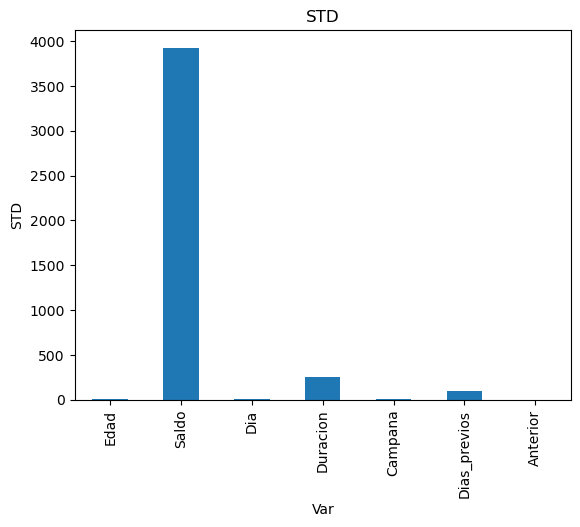

In [37]:
desv_e.plot(kind='bar')
plt.title('STD')
plt.xlabel('Var')
plt.ylabel('STD')
plt.xticks(rotation=90)
plt.show()

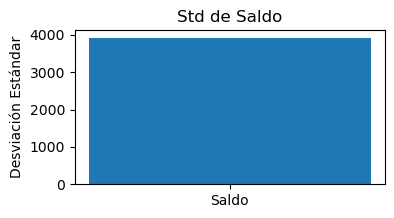

In [39]:
# Graficar la desviación estándar de 'pdays'
plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('Saldo', std_s)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Std de Saldo')
plt.ylabel('Desviación Estándar')
plt.show()

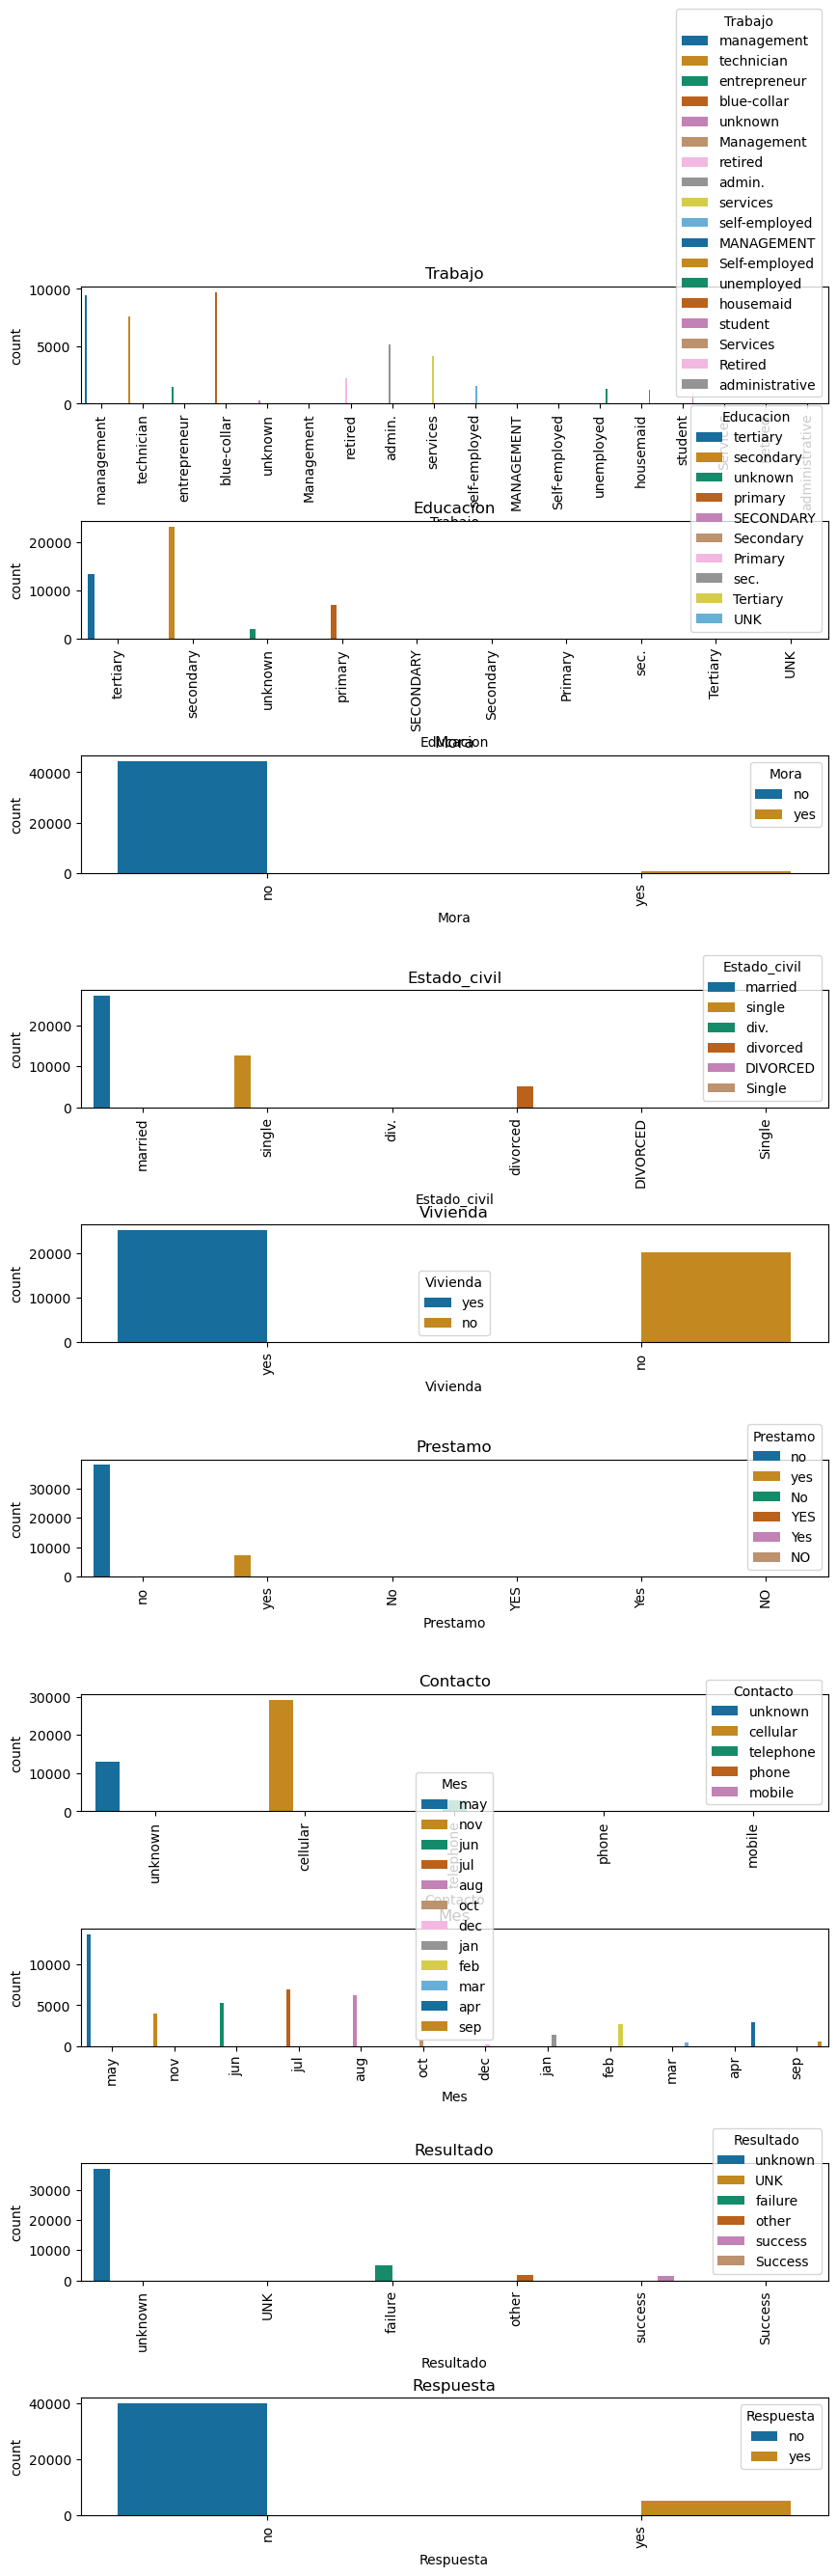

In [41]:
# Grafica subniveles de cada variable categórica
# import matplotlib.pyplot as plt

cols_cat1 = ['Trabajo', 'Educacion', 'Mora', 'Estado_civil',
             'Vivienda', 'Prestamo', 'Contacto', 'Mes', 'Resultado', 'Respuesta']

fig, ax = plt.subplots(nrows=len(cols_cat1), ncols=1, figsize=(10, 30)) #crea figuras y ejes
fig.subplots_adjust(hspace=1)  #Ajustar el espacio entre graficos 

for i, col in enumerate(cols_cat1): #Iteración sobre todas las filas de cada columna
    sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind')
    ax[i].set_title(col) #nombre de columna actual
    ax[i].tick_params(axis='x', labelrotation=90) #rotación de etiquetas del eje X
    ax[i].legend(title=col)  # Agrega leyenda aquí, si es necesario

plt.show()

# hue=col: permite dividir las barras por la misma variable, lo que puede no ser necesario si solo deseas contar

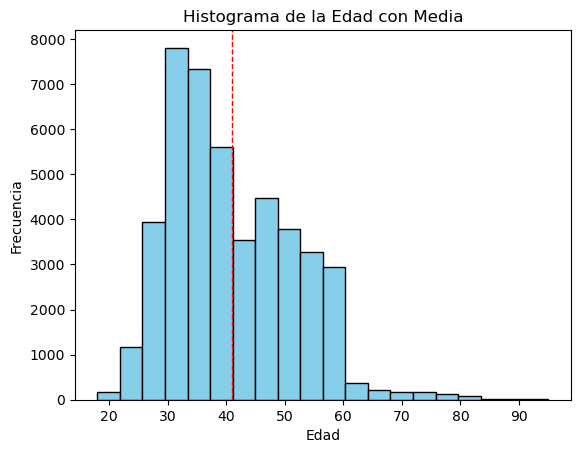

In [47]:
# Calcular la media de la edad
media_edad = data['Edad'].mean()

# Graficar un histograma del atributo "Edad"
plt.hist(data['Edad'], bins=20, color='skyblue', edgecolor='black')

# Agregar una línea vertical para mostrar la media
plt.axvline(media_edad, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Edad con Media')

# Mostrar la gráfica
plt.show()

#Si la mayoría de los datos se concentran en un rango específico, 
#como por ejemplo, entre los 20 y 30 años.

In [49]:
#Eliminar datos duplicados
data.drop_duplicates(inplace=True)
data.shape #Se eliminaron 5 registros

(45195, 18)

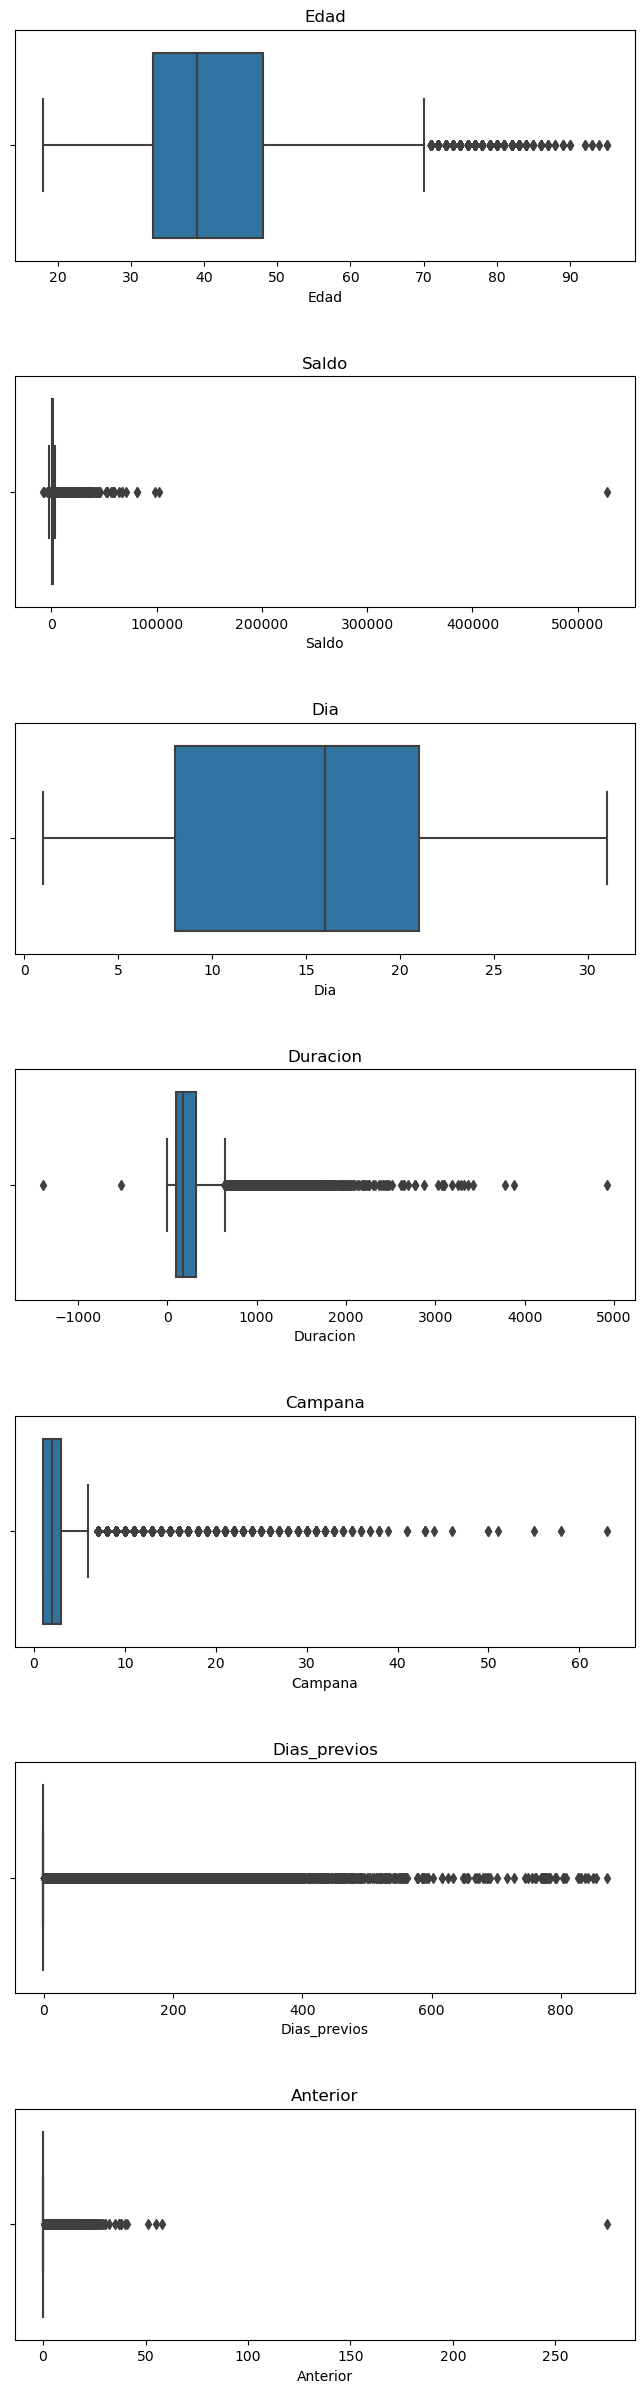

In [51]:
#Outliers
# Este tipo de gráfico es útil para identificar la distribución y detectar valores atípicos (outliers) en una variable numérica.
cols_num = ['Edad', 'Saldo', 'Dia', 'Duracion', 'Campana', 'Dias_previos', 'Anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

#Caja (rectángulo azul): Representa el rango intercuartil (IQR), que es el rango 
#donde se encuentran el 50% de los datos. En este caso, la mayor parte de las edades 
#está concentrada en un rango cercano a los valores bajos, posiblemente entre 0 y 100 años.
#_____________________________________________________________________________________________
#Línea dentro de la caja (mediana):.Parece estar muy cerca del valor mínimo, lo que sugiere 
#una distribución sesgada hacia la izquierda (muchos valores bajos).

#Bigotes: Los bigotes (líneas que salen de la caja) se extienden hasta los valores 
#que no se consideran outliers. Estos muestran el rango de los datos dentro de 1.5 
#veces el rango intercuartil.

#Puntos fuera de los bigotes (outliers): Los puntos que se observan fuera de los bigotes 
#(a la derecha) son valores atípicos. En este caso, hay varios valores extremadamente altos
#(más de 100 años, e incluso hasta 800)

#Investigar los outliers: Valores de edad superiores a 100 parecen poco probables, 
#por lo que deberías verificar si son errores de registro o si se deben manejar de 
#alguna manera, como eliminarlos o corregirlos.

In [53]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['Edad'] > 100].index)
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45195, 18)
Tamaño del set después de eliminar registros de edad: (45195, 18)


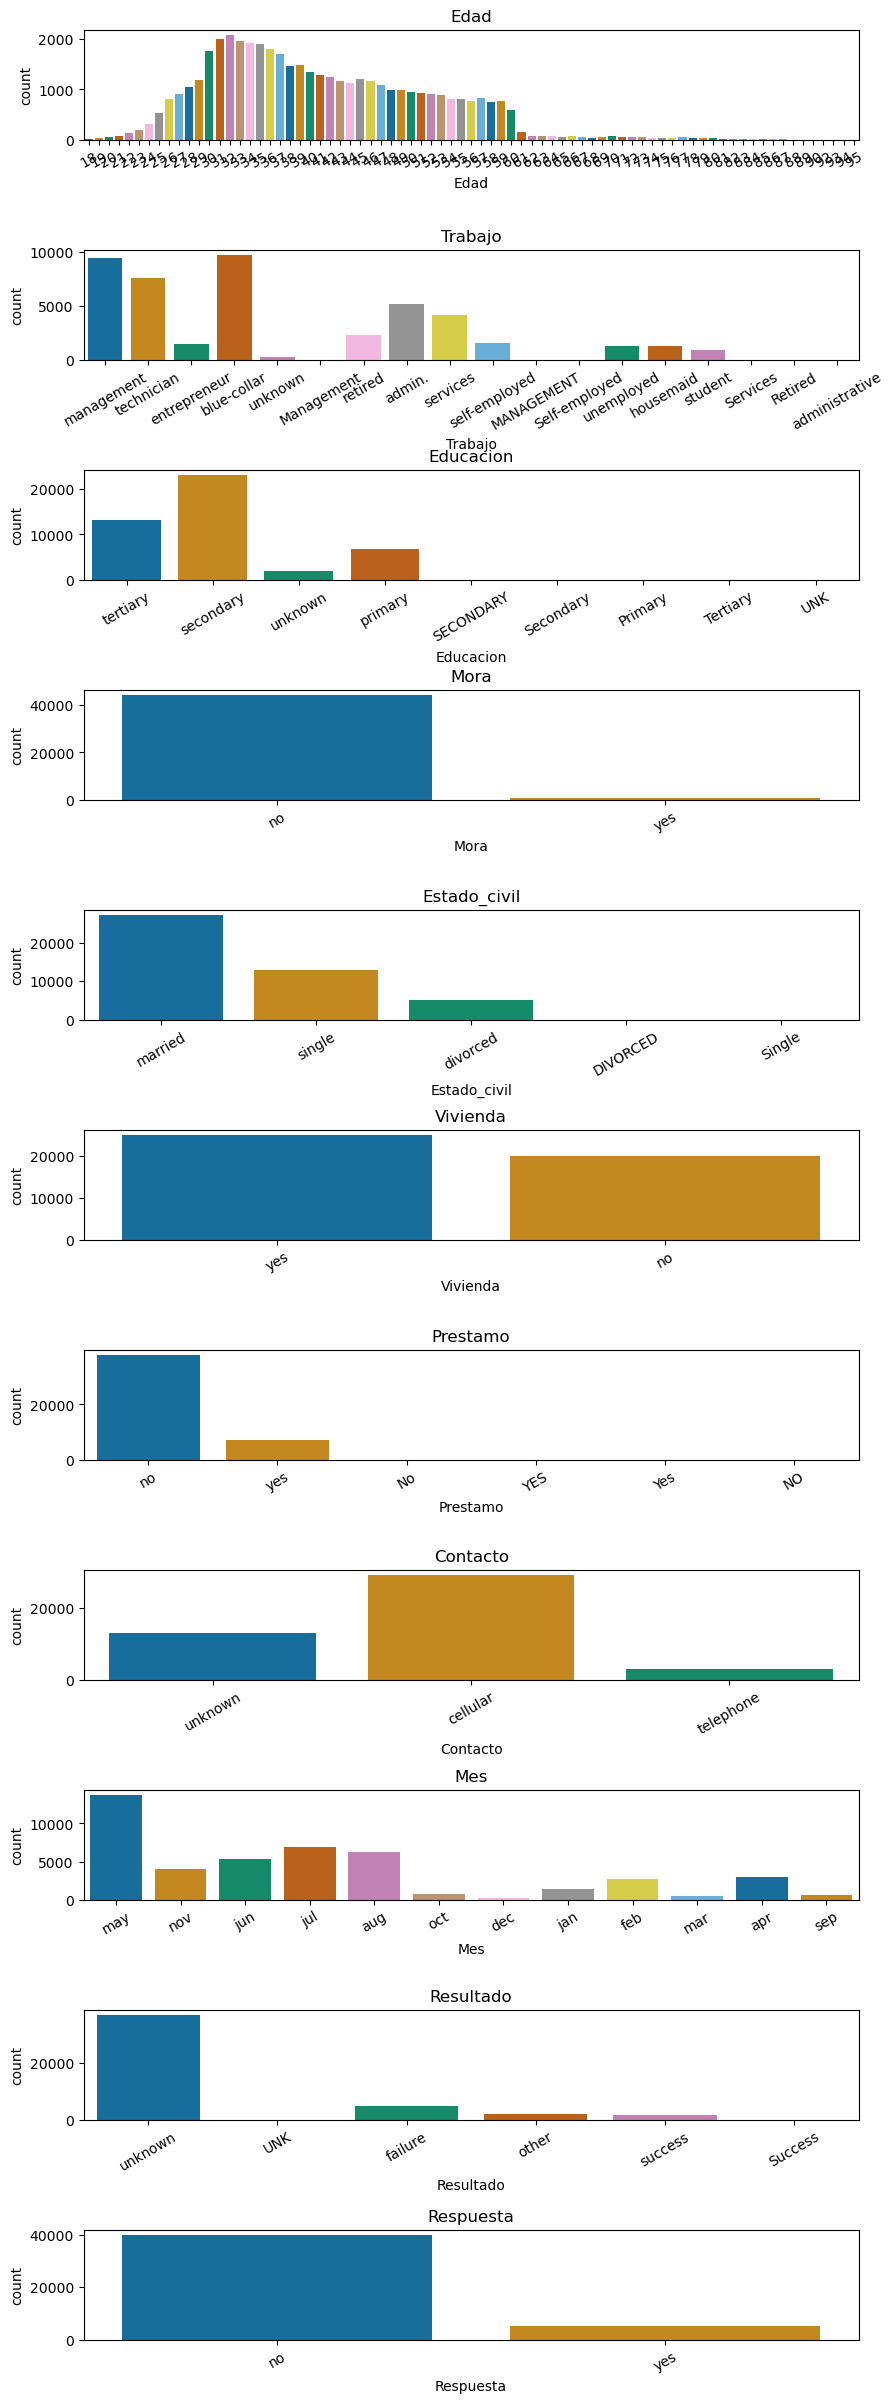

In [69]:
#Graficar los subniveles de cada variable categórica
cols_cat = ['Edad', 'Trabajo', 'Educacion', 'Mora', 'Estado_civil',
            'Vivienda', 'Prestamo', 'Contacto', 'Mes', 'Resultado', 'Respuesta']

# nrows especifica el número de filas de subgráficas.
# En este caso, se establece en len(cols_cat), que devuelve la cantidad de variables categóricas
# que tienes en la lista cols_cat. Esto significa que habrá una fila para cada variable categórica.

# Crear la figura y los ejes
fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=1)

# Graficar los subniveles de cada variable categórica
for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data, ax=ax[i], palette='colorblind')
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation=30)

plt.show()

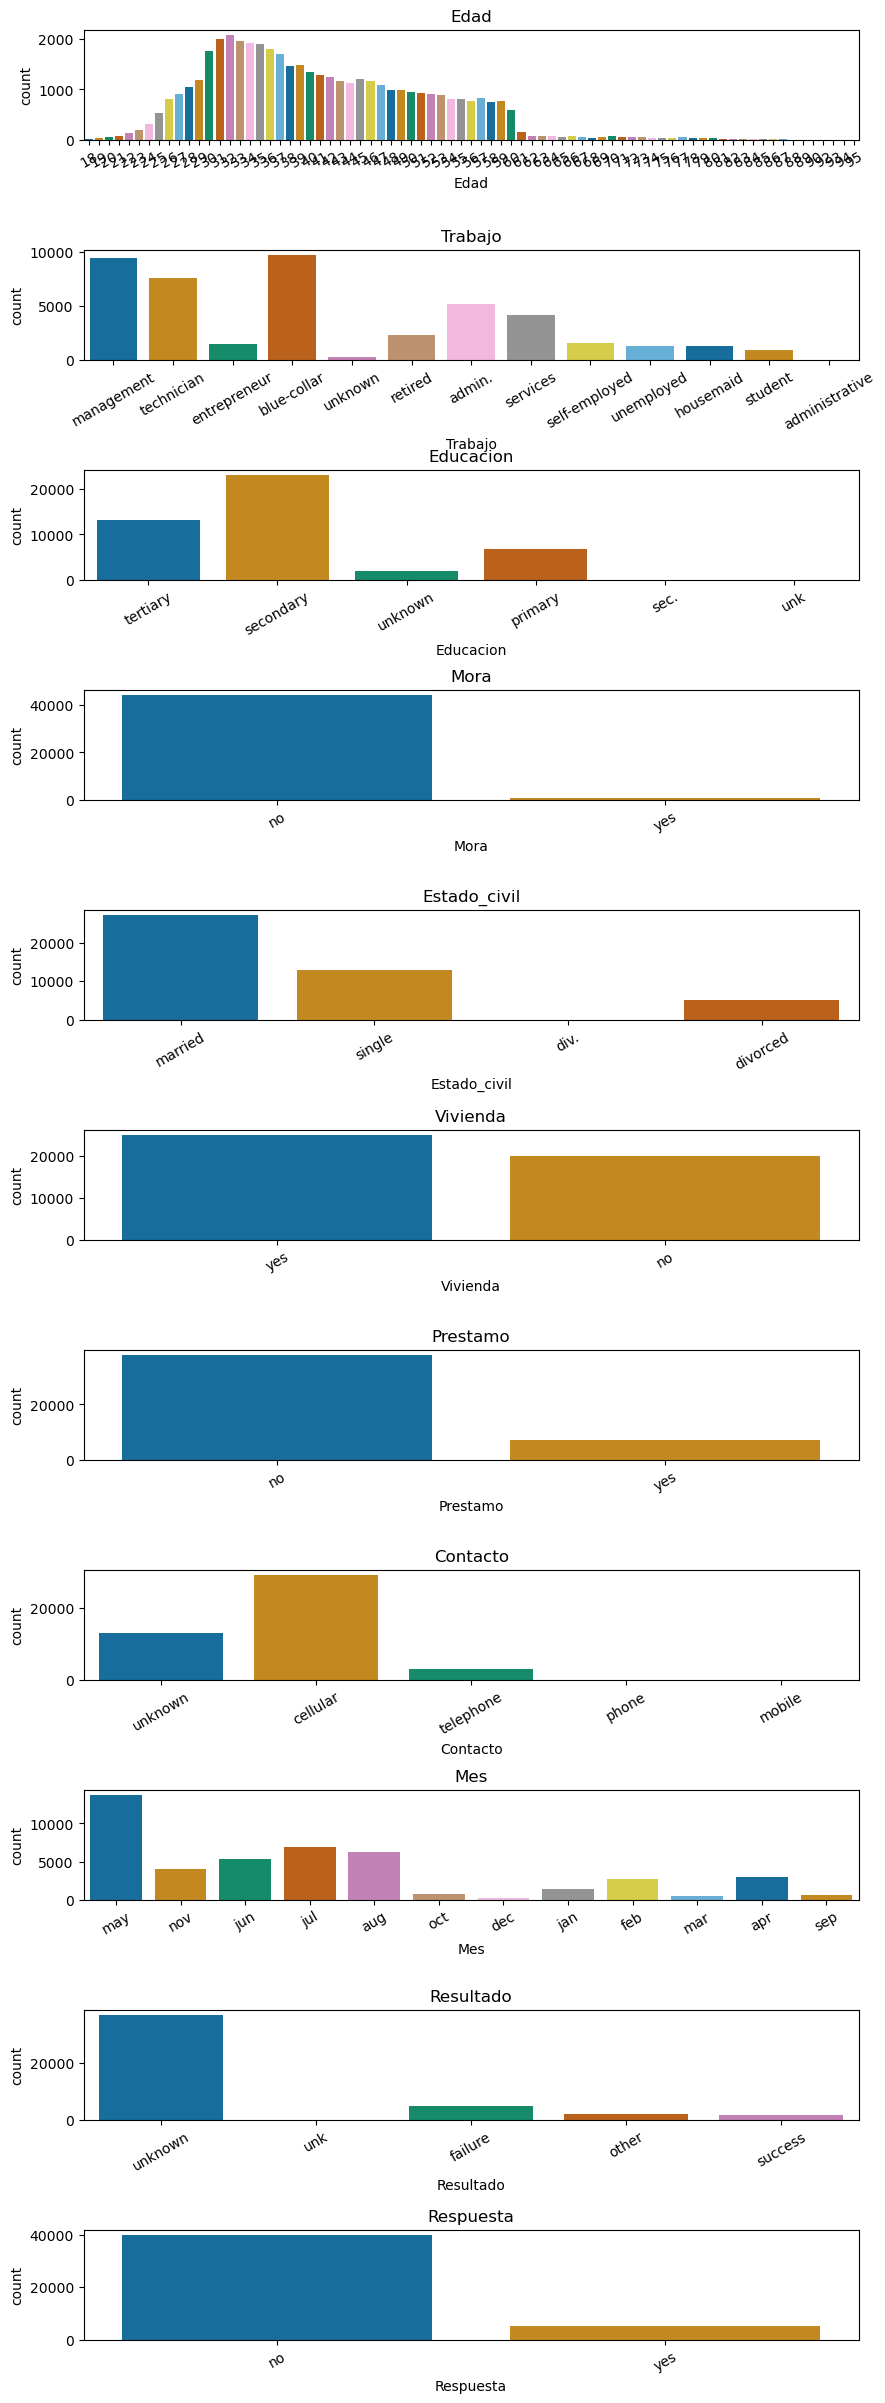

In [57]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica y de tipo string
    if column in cols_cat and data[column].dtype == 'object':
        data[column] = data[column].str.lower()

# Generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data, ax=ax[i], palette='colorblind')
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation=30)

In [71]:
# job: unificar admin. y administrative
# job: unificar admin. y administrative
print(data['Edad'].unique())
if data['Edad'].dtype == 'object':
    data['Edad'] = data['Edad'].str.replace('admin.', 'administrative', regex=False)
print(data['Edad'].unique())

# marital: unificar div. y divorced
print(data['Estado_civil'].unique())
if data['Estado_civil'].dtype == 'object':
    data['Estado_civil'] = data['Estado_civil'].str.replace('div.', 'divorced', regex=False)
print(data['Estado_civil'].unique())

# education: unificar sec. y secondary, unk y unknown
print(data['Educacion'].unique())
if data['Educacion'].dtype == 'object':
    data['Educacion'] = data['Educacion'].str.replace('sec.', 'secondary', regex=False)
    data.loc[data['Educacion'] == 'unk', 'Educacion'] = 'unknown'
print(data['Educacion'].unique())

# contact: unificar telephone y phone
print(data['Contacto'].unique())
if data['Contacto'].dtype == 'object':
    data.loc[data['Contacto'] == 'phone', 'Contacto'] = 'telephone'
    data.loc[data['Contacto'] == 'mobile', 'Contacto'] = 'cellular'
print(data['Contacto'].unique())

# poutcome: unificar unk y unknown
print(data['Resultado'].unique())
if data['Resultado'].dtype == 'object':
    data.loc[data['Resultado'] == 'unk', 'Resultado'] = 'unknown'
print(data['Resultado'].unique())


[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
['married' 'single' 'divorced' 'DIVORCED' 'Single']
['married' 'single' 'divorced' 'DIVORCED' 'Single']
['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'Tertiary' 'UNK']
['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'Tertiary' 'UNK']
['unknown' 'cellular' 'telephone']
['unknown' 'cellular' 'telephone']
['unknown' 'UNK' 'failure' 'other' 'success' 'Success']
['unknown' 'UNK' 'failure' 'other' 'success' 'Success']


In [91]:
data.columns

Index(['Edad', 'Trabajo', 'Estado_civil', 'Educacion', 'Mora', 'Saldo',
       'Vivienda', 'Prestamo', 'Contacto', 'Dia', 'Mes', 'Duracion', 'Campana',
       'Dias_previos', 'Anterior', 'Resultado', 'Respuesta'],
      dtype='object')

In [59]:
#Edad(age) promedio(mean) de los clientes interesados en adquirir un certificado de depósito(y)
edad_promedio_interesados = data[data['Respuesta'] == 'yes']['Edad'].mean()
print("1. Edad promedio de los clientes interesados:", edad_promedio_interesados)

1. Edad promedio de los clientes interesados: 41.66534241392357


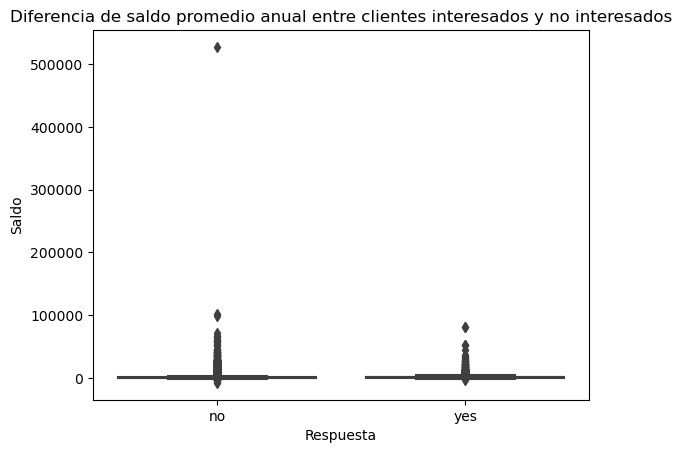

1374.0038057307224

In [61]:
#Diferencia de ingresos entre clientes interesados y no interesados:
saldo_promedio= data['Saldo'].mean()
sns.boxplot(x='Respuesta', y='Saldo', data=data)
plt.title('Diferencia de saldo promedio anual entre clientes interesados y no interesados')
plt.show()
saldo_promedio

In [63]:
data.Saldo

0        2143.0
1          29.0
2           2.0
3        1506.0
4           1.0
          ...  
45210     825.0
45211    1729.0
45212    5715.0
45213     668.0
45214    2971.0
Name: Saldo, Length: 45195, dtype: float64

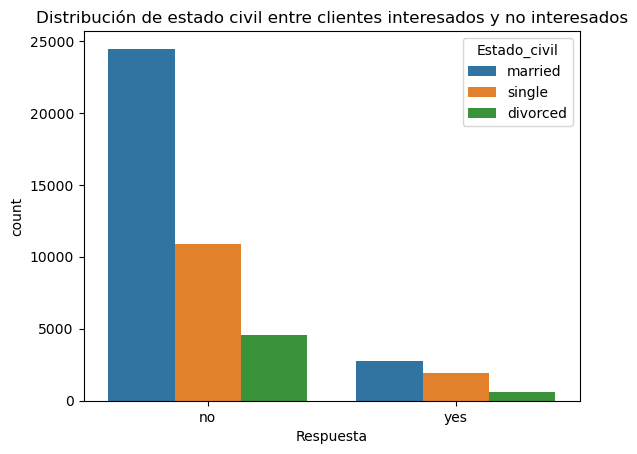

In [103]:
#Distribución de estado civil entre clientes interesados:
sns.countplot(x='Respuesta', hue='Estado_civil', data=data)
plt.title('Distribución de estado civil entre clientes interesados y no interesados')
plt.show()

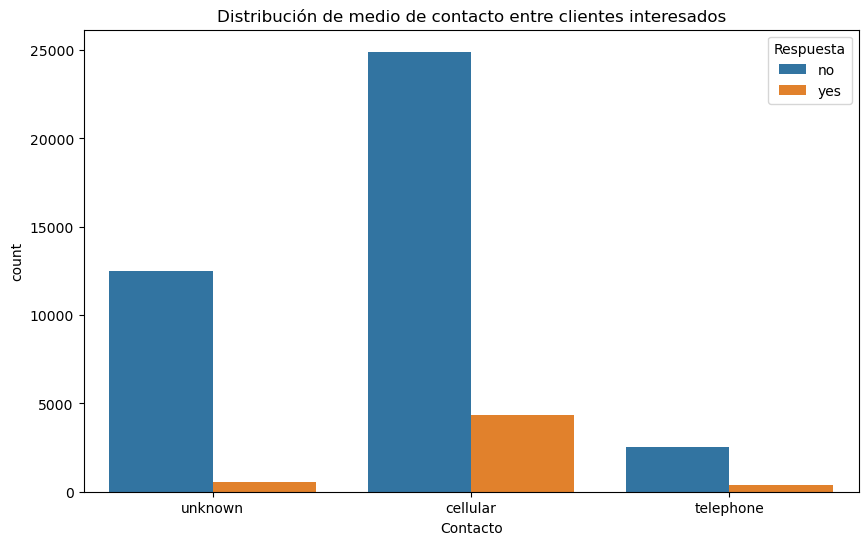

In [105]:
#Distribución medio de contacto de los clientes interesados:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contacto', hue='Respuesta', data=data)
plt.title('Distribución de medio de contacto entre clientes interesados')
plt.show()

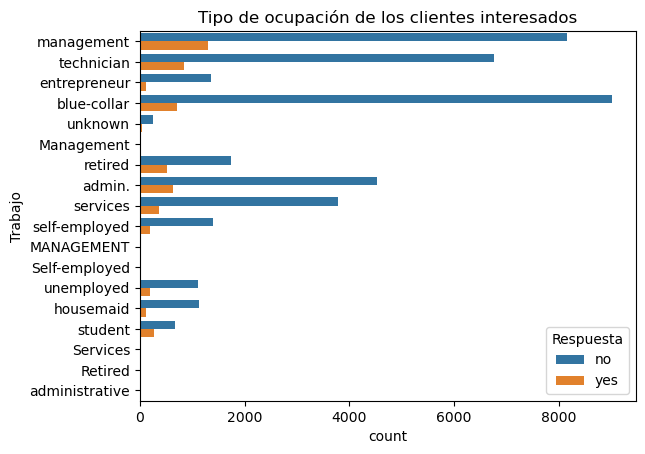

In [65]:
#Tipo de ocupación de los clientes interesados:
sns.countplot(y='Trabajo', hue='Respuesta', data=data)
plt.title('Tipo de ocupación de los clientes interesados')
plt.show()

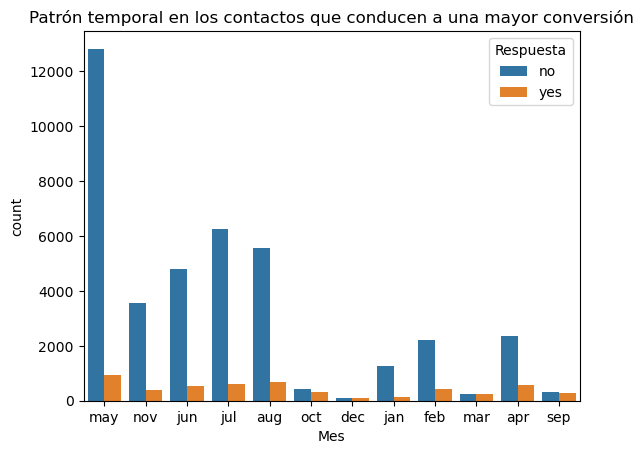

In [67]:
#Patrón temporal en los contactos que conducen a una mayor conversión de clientes:
sns.countplot(x='Mes', hue='Respuesta', data=data)
plt.title('Patrón temporal en los contactos que conducen a una mayor conversión')
plt.show()

In [43]:
!pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/5b/9e/18ace1bd7616642d4a933f2957908b5c6aeb612d1dd0d13c774c8667943f/ydata_profiling-4.10.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/df/e4/ba44652d562cbf0bf320e0f3810206149c8a4e99cdbf66da82e97ab53a15/pydantic-2.9.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/149.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/149.4 kB ? eta -:--:--
     ---------- -------------------------- 41.0/149.4 kB 279.3 kB/s eta 0:00:01
     --------------- --------------------- 61.4/149.4 kB 328.2 kB/s eta 0:00:01
     ---------------------- -------------- 92.2/149.4 kB 435.7 kB/s eta 0:00:01
     ---------------------- --------------

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\anaconda\\Lib\\site-packages\\~ydantic\\annotated_types.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [45]:
!pip install sweetviz

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 435.7 kB/s eta 0:00:35
   ---------------------------------------- 0.0/15.1 MB 435.7 kB/s eta 0:00:35
   ---------------------------------------- 0.0/15.1 MB 435.7 kB/s eta 0:00:35
   ---------------------------------------- 0.1/15.1 MB 438.1 kB/s eta 0:00:35
   ---------------------------------------- 0.1/15.1 MB 438.1 kB/s eta 0:00:35
   ---------------------------------------- 0.2/15.1 MB 525.1 kB/s eta 0:00:29
   ---------------------------------------- 0.2/15.1 MB 525.1 kB/s eta 0:00:29
   ---------------------------------------- 0.2/15.1 MB 525.1 kB/s eta 0:00:29
    -----------------------

In [77]:
#Instalación de librería
#Lo que se arrastra esta orientado a la pregunta 
!pip install pygwalker
import pygwalker as pyg


In [71]:
import sweetviz as sv
# from ydata_profiling import ProfileReport


In [115]:
pyg.walk(data)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006235fff1d6a1dUozORpw4nEbN8iWH" style="height: auto">\n    <hea…

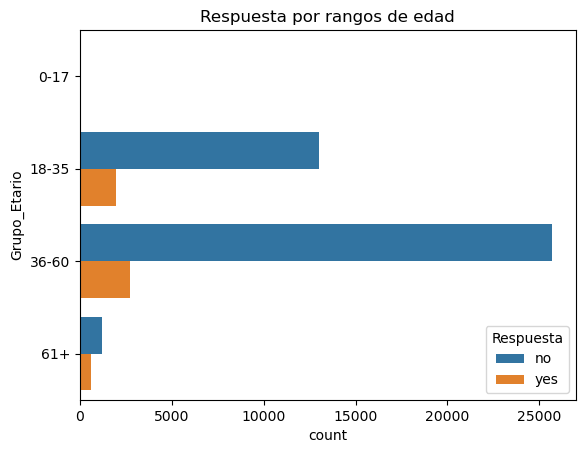

In [73]:
#Tipo de ocupación de los clientes interesados:
sns.countplot(y='Grupo_Etario', hue='Respuesta', data=data)
plt.title('Respuesta por rangos de edad')
plt.show()

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Cargar los datos
df = pd.read_csv('tu_dataset.csv')

# Verificar las columnas categóricas
cols_cat = ['Edad', 'Trabajo', 'Educacion', 'Mora', 'Estado_civil',
            'Vivienda', 'Prestamo', 'Contacto', 'Mes', 'Resultado', 'Respuesta']

# Convertir las columnas categóricas en números con LabelEncoder
le = LabelEncoder()
for col in cols_cat:
    df[col] = le.fit_transform(df[col])